In [29]:
import keras
from keras import layers
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [47]:
datagen = ImageDataGenerator(rescale=1.0/255.0)
# load and iterate training dataset
train = datagen.flow_from_directory('cityscapes_data/train/', class_mode='input', batch_size=32)
# load and iterate validation dataset
val = datagen.flow_from_directory('cityscapes_data/val/', class_mode='input', batch_size=32)

Found 2975 images belonging to 1 classes.
Found 499 images belonging to 1 classes.


In [48]:
input = layers.Input(shape=(256, 256, 3))

# Encoder
encoder = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
encoder = layers.Dropout(0.25)(encoder)
encoder = layers.MaxPooling2D((2, 2), padding="same")(encoder)
encoder = layers.Conv2D(16, (3, 3), activation="relu", padding="same")(encoder)
encoder = layers.MaxPooling2D((2, 2), padding="same")(encoder)

# Decoder
decoder = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(encoder)
decoder = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(decoder)
decoder = layers.Conv2D(3, (3, 3), activation="relu", padding="same")(decoder)

# Autoencoder
autoencoder = Model(input, decoder)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
dropout_8 (Dropout)          (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 128, 128, 16)      4624      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_transpose_19 (Conv2DT (None, 128, 128, 32)      464

In [49]:
# encoded form size
encoder.shape

TensorShape([None, 64, 64, 16])

In [55]:
filepath = "saved-model-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)
autoencoder.fit(
    x=train,
    epochs=20,
    verbose=1,
    shuffle=True,
    validation_data=val,
    callbacks=[checkpoint]
)

Epoch 1/20
93/93 [==============================] - 21s 226ms/step - loss: 0.5313 - val_loss: 0.5518

Epoch 00001: saving model to saved-model-01-0.55.hdf5
Epoch 2/20
93/93 [==============================] - 21s 225ms/step - loss: 0.5312 - val_loss: 0.5524

Epoch 00002: saving model to saved-model-02-0.55.hdf5
Epoch 3/20
93/93 [==============================] - 21s 226ms/step - loss: 0.5311 - val_loss: 0.5502

Epoch 00003: saving model to saved-model-03-0.55.hdf5
Epoch 4/20
93/93 [==============================] - 21s 225ms/step - loss: 0.5318 - val_loss: 0.5534

Epoch 00004: saving model to saved-model-04-0.55.hdf5
Epoch 5/20
93/93 [==============================] - 21s 225ms/step - loss: 0.5314 - val_loss: 0.5518

Epoch 00005: saving model to saved-model-05-0.55.hdf5
Epoch 6/20
93/93 [==============================] - 21s 226ms/step - loss: 0.5312 - val_loss: 0.5499

Epoch 00006: saving model to saved-model-06-0.55.hdf5
Epoch 7/20
93/93 [==============================] - 21s 226ms/st

In [1]:
from keras.models import load_model
model = load_model('saved-model-20-0.55.hdf5')
model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
dropout_8 (Dropout)          (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 128, 128, 16)      4624      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_transpose_19 (Conv2DT (None, 128, 128, 32)      464

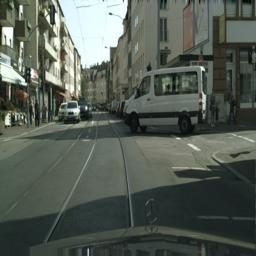

In [2]:
# outputs
from keras.preprocessing import image
from IPython.display import Image 

import numpy as np
def get_img(img_path):
    img = image.load_img(img_path)
    return np.expand_dims(image.img_to_array(img), axis=0)
img = 'cityscapes_data/val/0/6.jpg'
pred = model.predict(get_img(img))
pred = pred[0]
pred_img = image.array_to_img(pred)
pred_img.save('output.jpg')
Image(img)
# Input Image

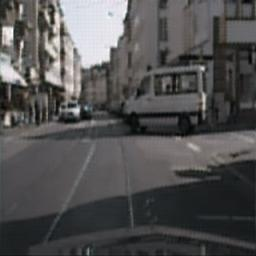

In [3]:
# Output Image from Model
Image('output.jpg')